#  Homework 1 (HW1)
Deadline: February 27 at 11:59pm

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW1/1)

In this exercise we will investigate income inequality and life expectancy indicators for different countries and regions. We will use data from the gapminder website (http://www.gapminder.org/data/). (50%)

**a)** Download the *countries.csv* file from Moodle and save it into a *Data* folder in the same directory as this notebook. Use the relative path to load it as a pandas DataFrame named *countries* using the read_csv() function. From Gapminder import the *Income per person (GDP/capita, PPP$ inflation-adjusted)* and *Life expentancy (years)* data. Name them *income* and *life_exp* respectively. You can read in the data without dowloading it to your computer using this code:

<code>pd.read_excel('https://docs.google.com/spreadsheets/d/1gZZ28UiWCVue-tFHMEVOvSO58x7x-w20E23l1wZTR3E/export?format=xlsx', sheet_name='data-GDP-per-capita-in-columns')</code><br>
<br><code>pd.read_excel('https://github.com/Gapminder-Indicators/lex/raw/master/lex-by-gapminder.xlsx', sheet_name='countries_and_territories')</code><br>

In [51]:
import pandas as pd
import numpy as np

countries = pd.read_csv('data/countries.csv')


income = pd.read_excel('https://docs.google.com/spreadsheets/d/1gZZ28UiWCVue-tFHMEVOvSO58x7x-w20E23l1wZTR3E/export'
                      '?format=xlsx', sheet_name='data-GDP-per-capita-in-columns')
income.columns = income.iloc[2]
income = income.iloc[3:]
income.reset_index(inplace=True)
income.drop('index', axis=1)


life_exp = pd.read_excel('https://github.com/Gapminder-Indicators/lex/raw/master/lex-by-gapminder.xlsx',
                         sheet_name='countries_and_territories')

In [52]:
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [53]:
income.head()

2,index,geo,Country Name,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,...,2041.0,2042.0,2043.0,2044.0,2045.0,2046.0,2047.0,2048.0,2049.0,2050.0
0,3,afg,Afghanistan,674.0,674.0,674.0,674.0,674.0,674.0,674.0,...,2880.0,2942.0,3004.0,3068.0,3133.0,3200.0,3267.0,3337.0,3408.0,3480.0
1,4,alb,Albania,746.0,746.0,746.0,746.0,746.0,747.0,747.0,...,24470.0,24990.0,25520.0,26062.0,26615.0,27181.0,27758.0,28347.0,28949.0,29563.0
2,5,dza,Algeria,788.0,788.0,788.0,788.0,788.0,788.0,788.0,...,13237.0,13518.0,13805.0,14098.0,14398.0,14703.0,15015.0,15334.0,15660.0,15992.0
3,6,and,Andorra,1338.0,1341.0,1343.0,1346.0,1348.0,1351.0,1353.0,...,108493.0,110796.0,113148.0,115551.0,118004.0,120509.0,123067.0,125680.0,128348.0,131073.0
4,7,ago,Angola,691.0,693.0,697.0,700.0,702.0,705.0,709.0,...,8044.0,8215.0,8389.0,8567.0,8749.0,8935.0,9124.0,9318.0,9516.0,9718.0


In [54]:
life_exp.head()

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Abkhazia,Life expectancy,abkh,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Life expectancy,afg,lex,28.21,28.20,28.19,28.18,28.17,28.16,...,69.95,70.07,70.19,70.31,70.44,70.57,70.70,70.83,70.96,71.09
2,Akrotiri and Dhekelia,Life expectancy,akr_a_dhe,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Life expectancy,alb,lex,35.40,35.40,35.40,35.40,35.40,35.40,...,88.29,88.40,88.51,88.62,88.73,88.84,88.95,89.06,89.17,89.28
4,Algeria,Life expectancy,dza,lex,28.82,28.82,28.82,28.82,28.82,28.82,...,89.37,89.49,89.61,89.73,89.85,89.97,90.09,90.21,90.33,90.45


**b)** Represent the distribution of income per capita (across countries) for a given year (for example: 2007) with a histogram! (Hint: use the *.hist()* function on the desired data column)

<AxesSubplot:>

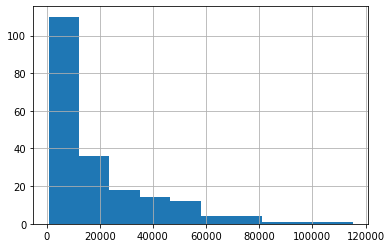

In [55]:
income[2007].hist()

**c)** Write a function that merges the  *countries*, *income* and *life_exp* DataFrames for a given year. The year should be the function's input. (Hint: Use the *pd.merge()* function!)

In [56]:
def merge_dfs(year=2023):
    merged_df = pd.merge(countries, income, left_on='Country', right_on='Country Name')[
        ['Country','Region',year]
    ].rename(columns={year: f'Income in {year}'})
    merged_df = pd.merge(merged_df, life_exp, left_on='Country', right_on='geo.name')[
        ['Country', 'Region', f'Income in {year}', year]
    ].rename(columns={year: f'Life Expectancy in {year}'})

    return merged_df

merge_dfs(2007)

,Country,Region,Income in 2007,Life Expectancy in 2007
0,Algeria,AFRICA,10718.0,75.87
1,Angola,AFRICA,6921.0,57.84
2,Benin,AFRICA,2685.0,60.27
3,Botswana,AFRICA,14052.0,51.13
4,Burundi,AFRICA,816.0,55.42
...,...,...,...,...
171,Paraguay,SOUTH AMERICA,9192.0,74.13
172,Peru,SOUTH AMERICA,8629.0,77.70
173,Suriname,SOUTH AMERICA,15554.0,69.74
174,Uruguay,SOUTH AMERICA,14828.0,75.81


**d)** Using the dataframe created in part c), present a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) of the distribution of income per capita (across countries) for the years 1950 and 2010 grouped by region (continent). <span style="color:red">What changed in 60 years?</span>
(Hints: 1. Use the *pd.boxplot* function! 2. Use a logarithmic scale for the income axis!)

In [57]:
nineteen_fifty = merge_dfs(1950)
twenty_ten = merge_dfs(2010)

<AxesSubplot:>

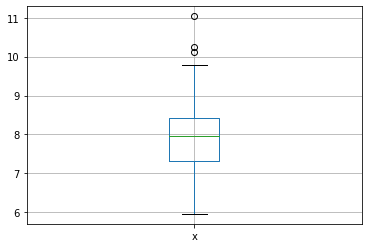

In [58]:
pd.DataFrame.boxplot(np.log(nineteen_fifty['Income in 1950']))

<AxesSubplot:>

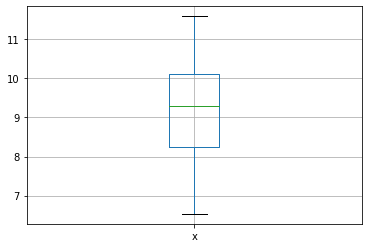

In [59]:
pd.DataFrame.boxplot(np.log(twenty_ten['Income in 2010']))

In [60]:
# it looks like the overall center (i.e. median in this case) has grown, while spread of the data has shrunk.
# This means that the overall income level has become better with time.

**e)** Represent the relationship between income per capita and life expectancy for a given year using a [scatter plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.scatter.html) based on the dataframe created in point c). <span style="color:red">What can you conclude from the plot?</span> (Hint: choose a year where there aren't many missing values!)

<AxesSubplot:xlabel='Income in 2010', ylabel='Life Expectancy in 2010'>

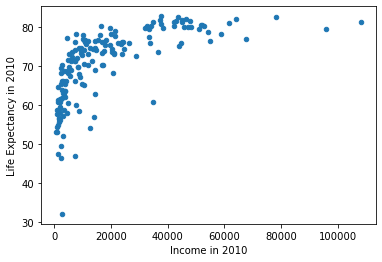

In [61]:
year = 2010
df = merge_dfs(year)

# We generally see that in 2010 there is an exponentially decaying effect of income to life expectancy, but only to
# about 80 years old
# we can model this with a function like:
# [Life Expectancy] = -1/[Income] + 80
df.plot.scatter(x=f'Income in {year}', y=f'Life Expectancy in {year}')

## Exercise 2 (HW1/2)

The [Round University Ranking (RUR)](https://roundranking.com/ranking/world-university-rankings.html#world-2021) evaluates the performance of 867 world’s leading higher education institutions by 20 indicators grouped into 4 key areas of university activity: Teaching, Research, International Diversity, Financial Sustainability. The top 100 universities are placed in the diamond league, the next 100 in the gold league and so on... (50%)

**a)**  Using the scraping techniques covered in class, scrape the following data fields about the universities (from the website linked above): The name of the University, in which country the University is located, their score and league given by the RUR ranking. Then load the data into a Pandas DataFrame called *df* with the following column names: <font style='font-style : oblique'>University</font>, <font style='font-style : oblique'>Country</font>, <font style='font-style : oblique'>Score</font> and <font style='font-style : oblique'>League</font>. (Hints: look for the 'table' tag, find the rows of the table with the 'tr' tag, and then loop through them extracting the requested elements).

IMPORTANT: You should not re-scrape the data every time you work on the homework, because we don't want the RUR servers to get overloaded. Instead, scrape the data once and then save it to a local file on your computer (Hint: use the *pd.to_csv()* function), then load the data from this file instead of re-scraping the website.

In [105]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

try:
    csv_name = 'rankings.csv'
    df = pd.read_csv('./data/' + csv_name, dtype='object')
    print(f'successfully read in {csv_name}!')
    print(df.head())

except Exception as e:
    url = 'https://roundranking.com/ranking/world-university-rankings.html#world-2021'
    print(f'error: {e}\nscraping {url}')

    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
    source = driver.page_source

    df = pd.read_html(source)[0]
    df.to_csv('./data/rankings.csv')

successfully read in rankings.csv!
  Unnamed: 0 Rank                                    University   Score  \
0          0    1                            Harvard University   100.0   
1          1    2  California Institute of Technology (Caltech)  99.636   
2          2    3                           Stanford University   97.05   
3          3    4                       Imperial College London  96.742   
4          4    5                          Karolinska Institute  96.609   

  Country Flag          League     Unnamed: 6  
0     USA  NaN  Diamond League  North America  
1     USA  NaN  Diamond League  North America  
2     USA  NaN  Diamond League  North America  
3      UK  NaN  Diamond League         Europe  
4  Sweden  NaN  Diamond League         Europe  


**b)** Filter the data as follows:
- Filter out the US universities. (The analysis aims to find out which universities rank high outside the USA to help US students in choosing a study abroad program.)
- Only keep the universities in the Diamond, Gold, Silver and Bronze league.
- Sort the dataframe by score. <span style="color:red">Which are the top 5 ranking universities?</span>

**c)** Create a stacked barplot showing what portion of each country's universities are in each league. Country should be on the y axis, number of universities on the x axis, and there should be a legend with the leagues. If you have done everything as written above, then the following code snippet creates the necessary crosstable:

<code>df2 = pd.crosstab(df.Country, df.League, values=df.University, aggfunc=len)[['Bronze League', 'Silver League', 'Golden League', 'Diamond League']].fillna(0)</code><br>

- Only keep the countries, which have at least 10 universities in the DataFrame.
- Sort the countries based on how many universities they have in the DataFrame.
- The labels on the y axis should be the countries, and the x axis should indicate the number of universities in the bronze, silver, gold and diamond leagues for the given country. 

Hint: This plot can be created in a very simple way by using the .plot.barh(stacked=True) method on the crosstable created in the code snippit above.

The barplot should look something like this:

<div>
<img src="https://media.licdn.com/dms/image/C4D22AQFjbmzYD8jo2w/feedshare-shrink_800/0/1676140611085?e=1678924800&v=beta&t=E5Xlq-u78bQVFzi-v5ye8Pyt4SazJi7cIFuAJaNqI1s" width="400"/>
</div>

**d)** In the last exercise you have to create a word cloud from the Mission Statements of the top Universities. We have already scraped these statements for you. You can find the scraped data [here](https://math.bme.hu/~pinterj/BevAdat1/Adatok/wordcloud.txt)! <br>
- Load the text data from this site into a string variable! (Hint: You can load the data with *urlopen* as shown in Notebook1)
- Omit the word "university" from the data!
- Create a word cloud, then <span style="color:red">describe what you see in 2-3 sentences!</span>

(Hint: You can find more information on how to create a Word Cloud at https://www.datacamp.com/community/tutorials/wordcloud-python)